## Data Science Task 2: 
#### Use Clustering Techniques for the any customer dataset using machine learning

In [1]:
#import all the required modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data
data = pd.read_csv('Mall_Customers.csv')

In [3]:
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Preprocess the data
X = data.iloc[:, 3:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

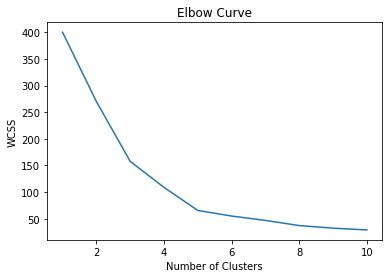

In [6]:
# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Perform K-means clustering with the chosen number of clusters
k = 5  # Chosen optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [8]:
# Assign the clusters to the data points
data['Cluster'] = kmeans.labels_

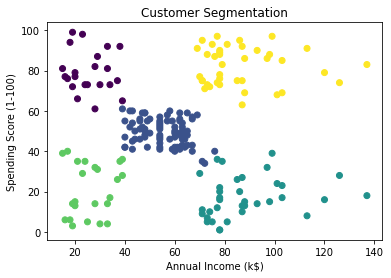

In [9]:
# Visualize the clusters
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.show()